In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
extension = '.csv'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == extension:
            print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/CAvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/RUvideos.csv


# Sample file reading

In [2]:
us_df = pd.read_csv('/kaggle/input/youtube-new/USvideos.csv', encoding = "latin")
us_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
us_df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

## 1. Equal Width of Histogram

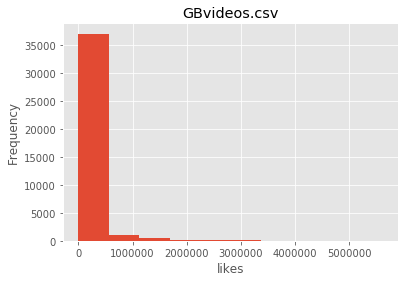

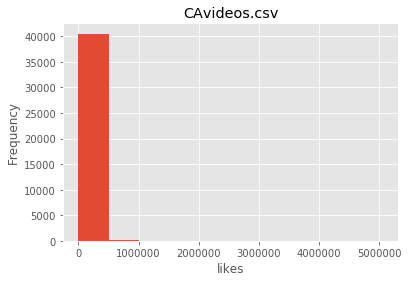

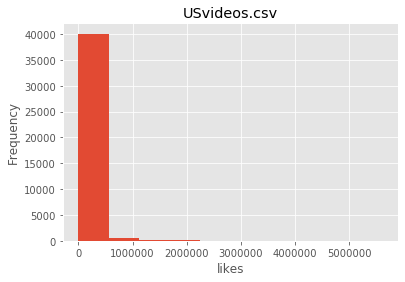

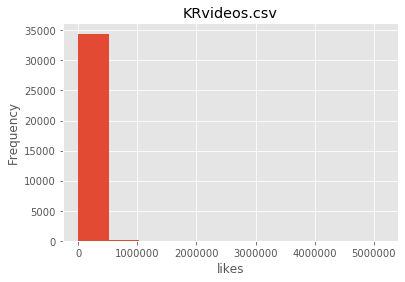

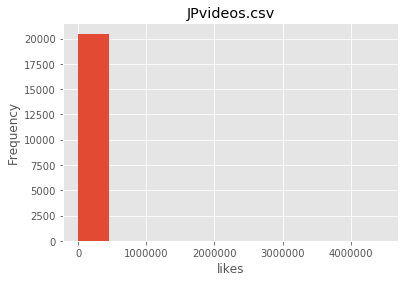

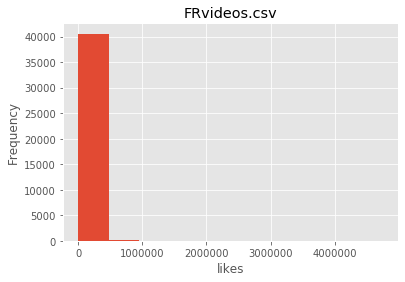

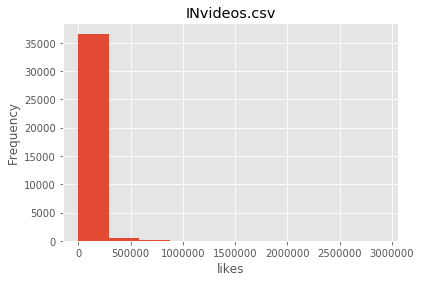

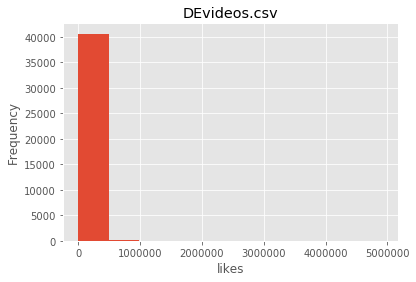

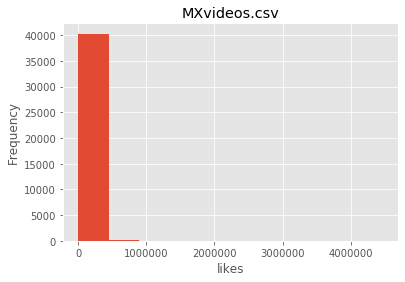

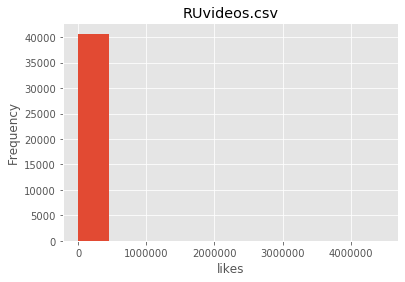

In [4]:
list_dataframes = []
extension = '.csv'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == extension:
            #print(os.path.join(dirname, filename))
            df = pd.read_csv(os.path.join(dirname, filename), encoding = "latin")
            list_dataframes.append(df)
            x = df['likes']
            plt.style.use('ggplot')
            plt.hist(x, bins=10)
            plt.xlabel('likes')
            plt.ylabel('Frequency')
            plt.title(filename)
            plt.show()
            
dataframe_full = pd.concat(list_dataframes, axis=0, ignore_index=True)


In [5]:
dataframe_full.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,âº HOW MY RELATIONSHIP STARTED!\nâº PB Merch...
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...
8,LMCuKltaY3M,17.14.11,Elbow - Golden Slumbers (John Lewis Advert 2017),ElbowVEVO,10,2017-11-10T08:00:01.000Z,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",154494,2163,147,211,https://i.ytimg.com/vi/LMCuKltaY3M/default.jpg,False,False,False,"âGolden Slumbersâ, originally by The Beatl..."
9,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190084,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O..."


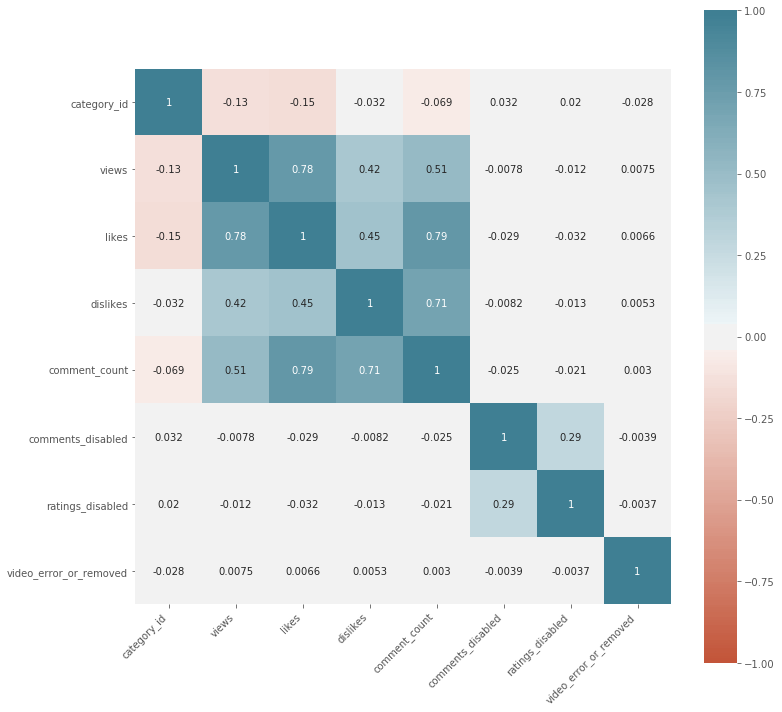

In [6]:
data = dataframe_full

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
sel_dataframe = dataframe_full[['likes','dislikes', 'views', 'comment_count']]

In [8]:
views=sel_dataframe['views']
df_without_view=sel_dataframe.drop(['views'],axis=1,inplace=False)
train,test,y_train,y_test=train_test_split(df_without_view,views, test_size=0.2,shuffle=False)
print(train.shape,test.shape,y_train.shape,y_test.shape)

(300753, 3) (75189, 3) (300753,) (75189,)


## 2 Regression Analysis

In [9]:
# REGRESSION ANALYSIS
model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 1541087.1661706576
Variance score: -0.59
Result : -0.591819776203399
        True Labels  Predicted Labels
300753        34174      1.097807e+05
300754        47189      5.871665e+04
300755       140408      5.287019e+04
300756       200462      1.788866e+05
300757        73366      5.037163e+05
...             ...               ...
375937       129488      1.767999e+05
375938        99163      1.904902e+05
375939       449611      1.091957e+06
375940        14225      5.474052e+04
375941        52340      1.122414e+05

[75189 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


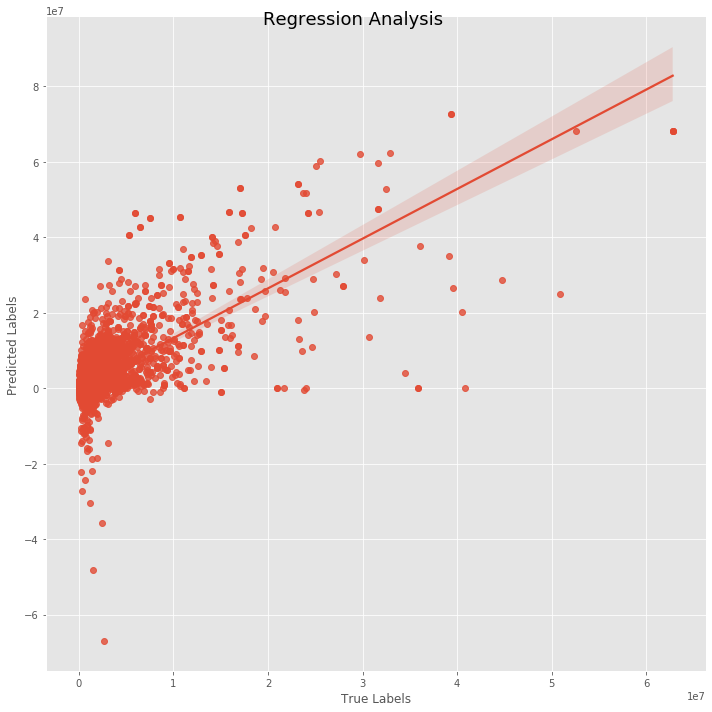

In [10]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Regression Analysis ", fontsize=18)
sns.set(font_scale = 1.5)

## 3 Min-Max normalization

In [11]:
us_sel_dataframe = us_df[['likes','dislikes', 'views', 'comment_count']]

In [12]:
normalized_us_sel_dataframe = us_sel_dataframe.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)

## 4 Agglomertive Cluster with max distance

In [13]:
clustering_model = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
clustering_model.fit(normalized_us_sel_dataframe)
clustering_model.labels_

array([23307, 21303, 25847, ...,     4,     1,     0])

## 5. Advise

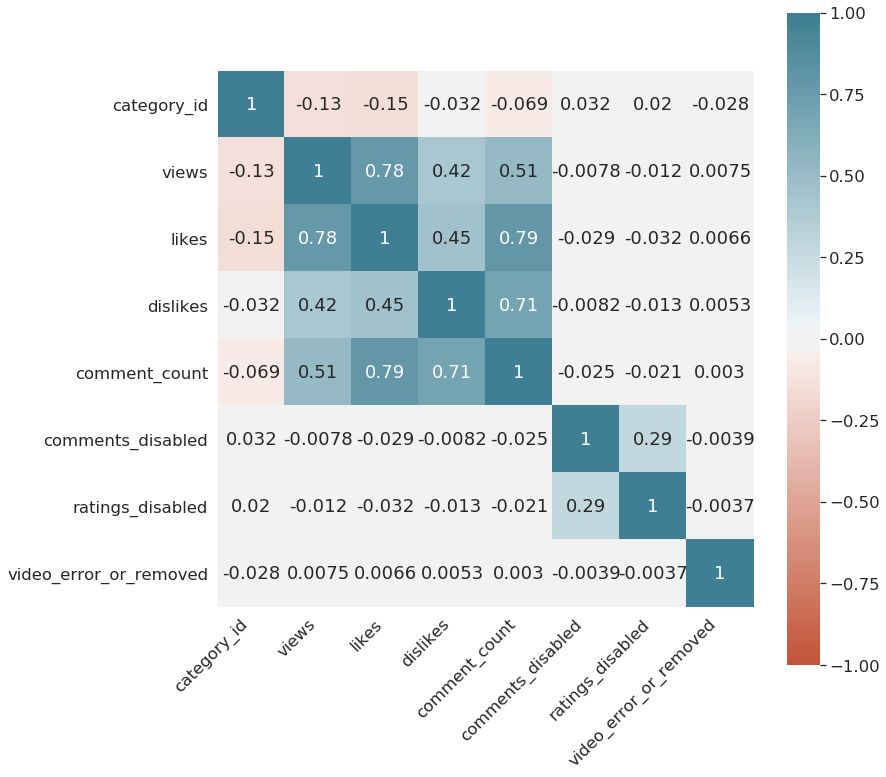

In [14]:
data = dataframe_full

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

The correlation map and correlation table above say that views and likes are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

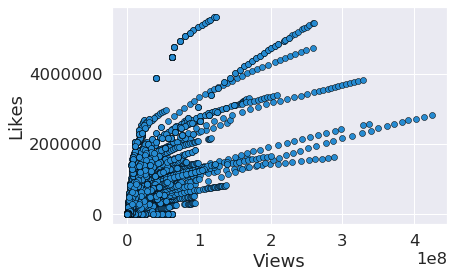

In [15]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
fig, ax = plt.subplots()
_ = plt.scatter(x=dataframe_full['views'], y=dataframe_full['likes'], color=PLOT_COLORS[0], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

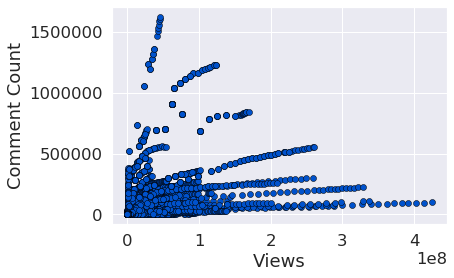

In [16]:
fig, ax = plt.subplots()
_ = plt.scatter(x=dataframe_full['views'], y=dataframe_full['comment_count'], color=PLOT_COLORS[1], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Comment Count")

We see that views and Comment count also are truly positively correlated: as one increases, the other increases too—mostly.

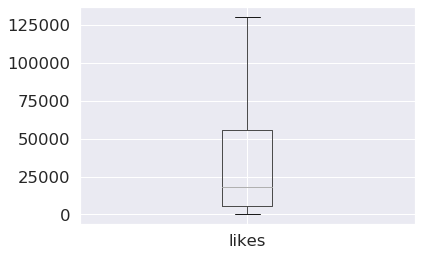

In [17]:
boxplot_likes = us_sel_dataframe.boxplot(column=['likes'], grid=True, showfliers=False)


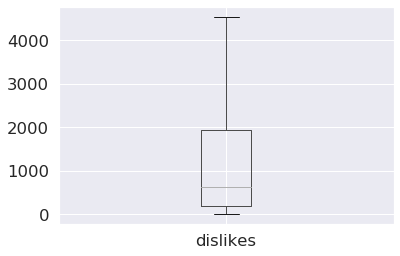

In [18]:
boxplot_dislikes = us_sel_dataframe.boxplot(column=['dislikes'], grid=True, showfliers=False)


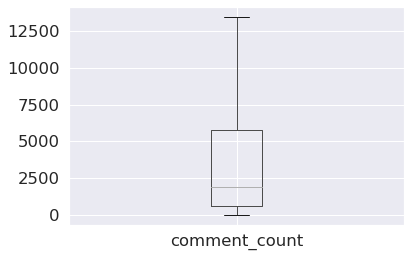

In [19]:
boxplot_comment_count = us_sel_dataframe.boxplot(column=['comment_count'], grid=True, showfliers=False)

from box plot we see that most of the trending videos have 10000 to 50000 likes 

## 6. Hierarchcal Form

In [20]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



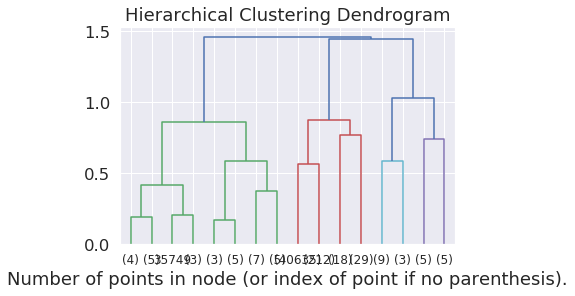

In [21]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering_model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()